# Introduction 
This notebook investigates a series of regression models and explores which are more suited to extrapolation. 

Extrapolation refers to the process of making predictions using a regression model on data points that fall outside the range of the model's training data. It extends the model's estimated relationship between the variables beyond the limits of the observed data. Predictions made by extrapolation are often less reliable and have higher uncertainty, as the model has not been trained on such data. It assumes that the relationships learned by the model remain consistent outside the observed range of data. Because of this assumption, there is a risk that the model's behavior can change outside the training data range, leading to inaccurate predictions.

Not all regression models are suited to make extrapolation. Different regression models are based on various underlying assumptions about the data and the relationships between variables. For extrapolation to be valid, these assumptions need to hold true even outside the observed range of the data, which is often not the case. Linear models assume a constant relationship between predictors and the target variable, which may not hold true beyond the range of training data. Non-linear models, such as tree-based methods and some types of neural networks, often model more complex relationships that can become highly unpredictable when applied outside the range they were trained on. Complex models like polynomial regression, deep neural networks, or models with high interaction terms might fit the training data very well but may not generalize beyond this range. These models can behave erratically outside the known data range, leading to unreliable extrapolation.

Extrapolation inherently means making predictions in a space where the model has no data support. All models, to some extent, rely on the distribution and characteristics of the training data. When extrapolating, the model makes assumptions about data behavior in unobserved regions, which can be highly speculative. Models like decision trees, random forests, and gradient boosting machines make decisions based on the thresholds in the input features observed in the training data. They do not have a way to infer the behavior of the target variable outside these thresholds, making them unsuitable for extrapolation. On the other hand, some models like ARIMA / SARIMA for time series data, are designed for extrapolation, they rely on the assumption that past patterns (eg: seasonality) will repeat in the future. This assumption is certainly does not hold in all cases, especially when it comes to black swan events. 

Extrapolation can lead to misinterpretation of the model results, as it is easy to overlook that the predictions are being made in a domain where the model has not been validated. This can lead to overconfidence in the model's predictive capabilities. While models can technically perform extrapolation, the reliability and accuracy of such predictions are often questionable and ought to be treated with skepticism.

Various regression models have been created to predict HDB flat prices in Singapore. Historical HDB sales data was used to train the models. Factors, such as the size of the flat, its location, age, proximity MRT stations, and even the floor levels of the unit were included in the training data. Since prices are also influenced by market trends and economic factors, macroeconomic data from each year is also included in the historical data used to create these regression models.

The machine learning models this notebook will investigate are:
- OLS Linear Regression 
- Ridge Regression 
- Lasso Regression 
- SVM
- Random Forest 
- XGBoost
- Dense Neural Network

# Creating the Extrapolation DataSet

#### Load Libraries

In [1]:
# Wrangling libraries
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load models
import pickle

#### Load Economic, HDB & Preselected Sample Testing Data

In [2]:
# Future economic data
econ_df = pd.read_csv('../data/processed/sg_econ_data_historical_future.csv')

In [3]:
# Read hdb data from csv
full_hdb_df = pd.read_parquet('../data/processed/final_HDB_for_model.parquet.gzip')

In [4]:
# Read preselected data from csv
pre_sample_df = pd.read_csv('../data/processed/testing_sample_hdb.csv')
pre_sample_df

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,max_floor_lvl,most_closest_mrt,walking_time_mrt
0,CENTRAL AREA,4 ROOM,46 TO 48,97.0,Type S1,2011,50.0,OUTRAM PARK,238.0
1,TAMPINES,4 ROOM,07 TO 09,104.0,Model A,1988,11.0,SIMEI,426.0
2,BUKIT TIMAH,4 ROOM,07 TO 09,104.0,Model A,1988,14.0,BEAUTY WORLD,346.0


#### Load Models

In [6]:
XGBoost = pickle.load(open('../models/final_XGBoost_231204.pkl', 'rb'))
randomForest = pickle.load(open('../models/randomForest_240129.pkl', 'rb'))
denseNN = pickle.load(open('../models/denseNN_231214.pkl', 'rb'))
linear = pickle.load(open('../models/linear_240130.pkl', 'rb'))
ridge = pickle.load(open('../models/ridge_240130.pkl', 'rb'))
lasso = pickle.load(open('../models/lasso_240130.pkl', 'rb'))

/Users/gobind/.pyenv/versions/3.10.6/envs/hdb-price-estimator/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator FunctionTransformer from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/gobind/.pyenv/versions/3.10.6/envs/hdb-price-estimator/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/gobind/.pyenv/versions/3.10.6/envs/hdb-price-estimator/lib/python3.10/site-packages/sklearn/base.py:3

| Regression          | Test r2 score | Test Mean Absolute Error |
| --------            | -------       | ------- |
| OLS Linear          | 0.87          | $44803.89    |
| Ridge               | 0.87          | $44804.05     |
| Lasso               | 0.87          | $44813.37    |
| XGBoost             | 0.98          | $15870.06    |
| Random Forest       | 0.98          | $15027.17     |
| Dense Neural Network| 0.98          | $17318.09    |

#### Extract Random Sample

In [7]:
# Extract a single random row from full HDB data
sample_df = full_hdb_df.sample()

# Drop unnecessary columns for the model
# Put all columns to be deleted into a list
drop_cols = ['block', 'street_name','address','sold_year_month', 'resale_price'] + \
            ['sold_year', 'sold_remaining_lease',
             '5 year bond yields','GDPm (Current Prices)', 'GDP per capita', 'Personal Income m',
             'Unemployment Rate', 'Core inflation', 'Median Household Inc',
             'Lime, Cement, & Fabricated Construction Materials Excl Glass & Clay Materials',
             'Clay Construction Materials & Refractory Construction Materials',
             'ResidentPopulation','ResidentPopulation_Growth_Rate']

# Drop columns
sample_df = sample_df.drop(columns=drop_cols)

# Vew Sample Row
sample_df

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,max_floor_lvl,most_closest_mrt,walking_time_mrt
135368,TAMPINES,4 ROOM,01 TO 03,104.0,Model A,1988,11.0,SIMEI,495.0


#### Create Testing DataFrame and Run Extrapolation 

In [14]:
# Take first row of sample and create to create testing dataframe
# Code written like this so that it can also be used with the preselected sample dataframe
test_df = sample_df.iloc[0:1].copy().reset_index(drop=True)

# Create variables to use in the creating of the testing data frame
resale_year = test_df['lease_commence_date'][0] + 4
factor = 2034 - test_df['lease_commence_date'][0] - 4

# Multiply single sample row to insert testing data for each year
test_df = pd.concat([test_df] * factor, ignore_index=True)

# Create year column using variables created earlier
year_range = range(resale_year, resale_year + factor)
test_df['sold_year'] = year_range

# Include economic data in the testing dataframe
test_df = test_df.merge(econ_df, left_on='sold_year', right_on='year', how='left')

# Create remaining lease column for prediction years
test_df['sold_remaining_lease'] = 99 - (test_df['sold_year'] - test_df['lease_commence_date'])

# Reorient columns to be used in the pipelines
test_df = test_df[['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'sold_year', 'sold_remaining_lease',
       'max_floor_lvl', '5 year bond yields', 'GDPm (Current Prices)',
       'GDP per capita', 'Personal Income m', 'Unemployment Rate',
       'Core inflation', 'Median Household Inc',
       'Lime, Cement, & Fabricated Construction Materials Excl Glass & Clay Materials',
       'Clay Construction Materials & Refractory Construction Materials',
       'most_closest_mrt', 'walking_time_mrt', 'ResidentPopulation',
       'ResidentPopulation_Growth_Rate']]

# Remove any dates before 1990 as it creates NaNs
test_df = test_df[test_df['sold_year'] >= 1990].reset_index(drop=True)

# Apply models and put predictions in new columns
test_df['XGBoost'] = XGBoost.predict(test_df)
test_df['random_forest'] = randomForest.predict(test_df)
test_df['dnn'] = denseNN.predict(test_df)
test_df['linear'] = linear.predict(test_df)
test_df['ridge'] = ridge.predict(test_df)
test_df['lasso'] = lasso.predict(test_df)

# Extract results into new dataframe for plotting
test_results = test_df[['sold_year','XGBoost', 'random_forest', 'dnn', 'linear', 'ridge', 'lasso']]

# Extract historical data from full HDB dataframe for plotting against test results
temp = full_hdb_df[(full_hdb_df['town'] == test_df['town'][0]) &
                                    (full_hdb_df['flat_type'] == test_df['flat_type'][0]) &
                                    (full_hdb_df['storey_range'] == test_df['storey_range'][0]) &
                                    (full_hdb_df['most_closest_mrt'] == test_df['most_closest_mrt'][0])
                                    ].groupby(['sold_year'])['resale_price'].mean()\
                                     .to_frame(name='historical_mean').reset_index()

# Include historical mean resale prices in test results dataframe
test_results = test_results.merge(temp, on = 'sold_year', how = 'left')

# View
test_results.tail(10)

2/2 [==============================] - 0s 2ms/step


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.0s


,sold_year,XGBoost,random_forest,dnn,linear,ridge,lasso,historical_mean
0,1992,103460.601562,98203.0,97822.289062,211984.236452,211958.923692,211928.743713,93160.909091
1,1993,161822.171875,156210.0,139750.859375,231605.290878,231567.089456,231540.727866,140924.242424
2,1994,196696.250000,193295.0,193852.437500,243891.957690,243865.597186,243839.829039,173051.294118
3,1995,228569.437500,228152.5,230806.875000,246934.008169,246902.815100,246867.860091,218243.243243
4,1996,322389.250000,312630.0,328009.437500,265581.704219,265545.027507,265514.215711,312979.452055


#### Plot Extrapolation Results

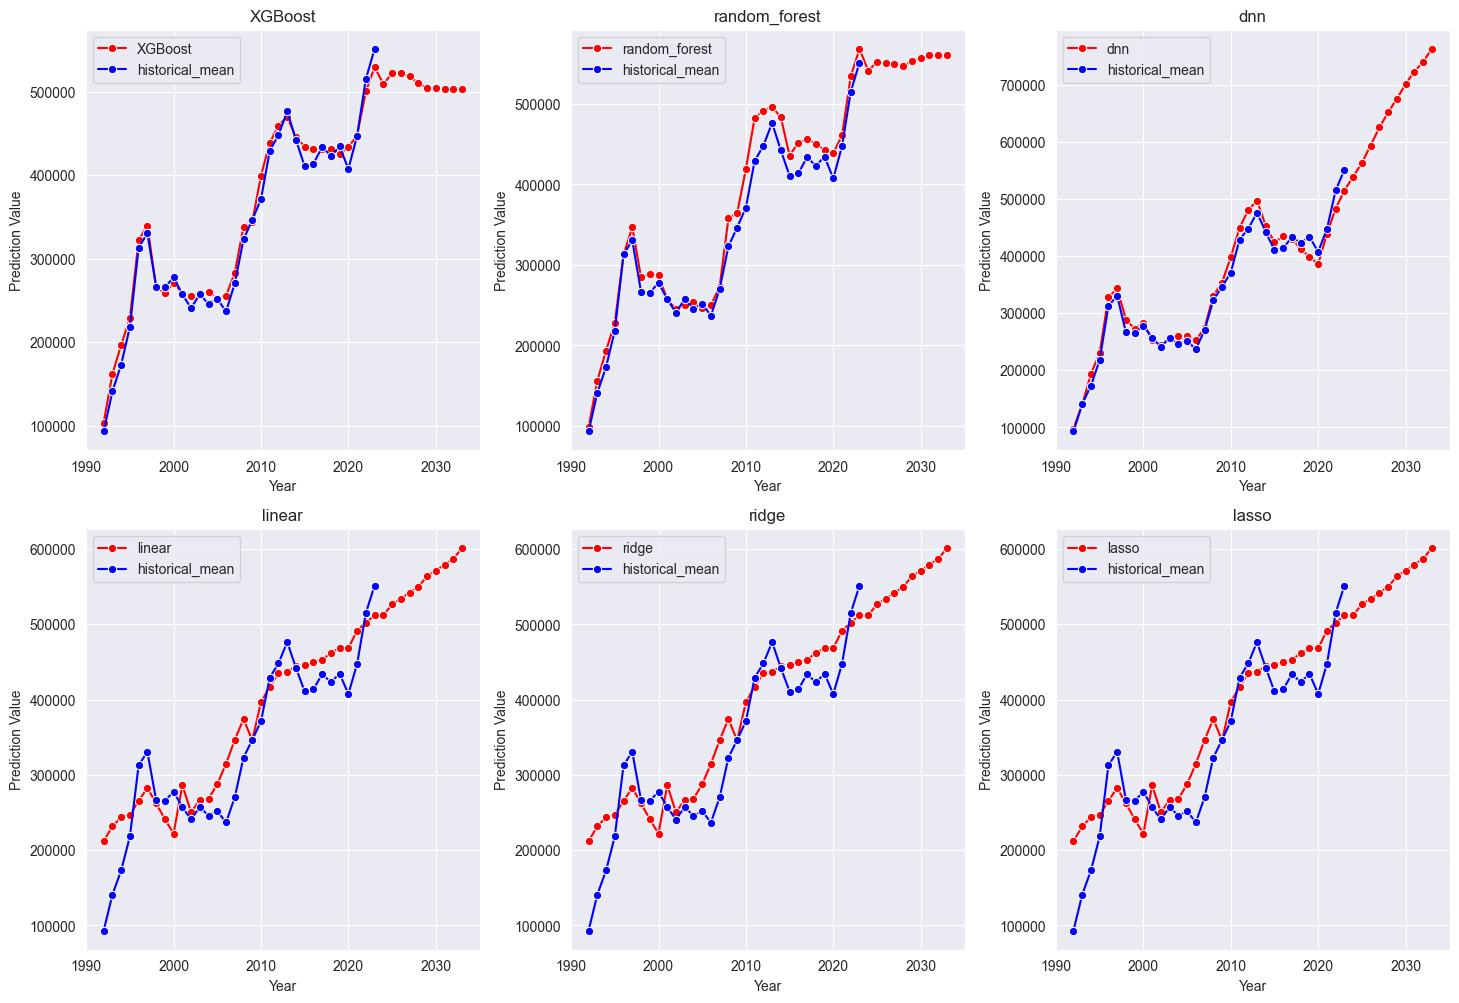

In [27]:
# Plot results using Seaborn
# Create plotting variables
models = ['XGBoost', 'random_forest', 'dnn', 'linear', 'ridge', 'lasso']
n_models = len(models)
factor = n_models ** 0.5

# Plot figure in a 3x2 table
plt.figure(figsize = (n_models * factor, n_models * factor))
for i, model in enumerate(models):
    plt.subplot(3, 3, i + 1)
    sns.set_style("darkgrid")
    sns.lineplot(x = 'sold_year', y = model, data = test_results, label = model, color = 'red',  marker = 'o')
    sns.lineplot(x = 'sold_year', y = 'historical_mean', data = test_results, label = 'historical_mean', color = 'blue', marker = 'o')
    plt.title(model)
    plt.xlabel('Year')
    plt.ylabel('Prediction Value')
    plt.legend()
plt.tight_layout()
plt.show()

# Results 
All models seem to be tracking closely with the historical mean resale prices until about 2023. This is no surprise since they were trained on historical data up until that point. It is however a visual confirmation that all these models have been appropriately trained and validated. When examining the predictions made by the models past 2023, there is a clear predictive divergence in the models when extrapolating.

- XGBoost & Random Forest
  - Post-2023, XGBoost projections flatten.
  - This indicates that it might not be capturing potential future trends.
  - XGBoost and random forest models follow similar trends and are closer to each other than to the other models. 
  - This suggests that tree-based models capture similar nonlinear patterns in the data.
- Linear, Ridge, & Lasso
  - All three models show a similar trajectory.
  - Explained by the linear nature of these models - ridge and lasso being regularized versions of linear regression.
  - No significant difference between the ridge and lasso predictions indicates that both L1 & L2 regularization results in a similar penalization (not statistically significant). 
  - Predictions rise more conservatively, implying less sensitivity to recent trends 
  - Possibly not capturing complex nonlinear relationships effectively.
- DNN - Dense Neural Network
  - Post-2023, predictions show an aggressive upward trend suggesting it may be capturing complex nonlinear patterns that anticipate future growth.
  - This is closer to what one may expect property trends to be in the future. 
  - Higher predictions could be due to DNN model giving a different sensitivity to the features it's been trained on.


In [34]:
# Plot results with plotly to allow interactivity
test_results_melt = test_results.melt(id_vars = 'sold_year', var_name = 'Model', value_name = 'Value')

fig = px.line(test_results_melt, x = 'sold_year', y = 'Value', color = 'Model',
              markers = True, title = f'Resale Price Predictions by Year <br><sup>{test_df["flat_type"][0].lower()} HDB in {test_df["town"][0].lower()} built in {test_df["lease_commence_date"][0]}</sup>',
              template = 'plotly_dark')
fig.update_layout(xaxis_title = 'Year', yaxis_title = 'Prediction Value',
                  legend_title = 'Click Models Below to Add / Remove', width = n_models * 200, height = n_models * 100)
fig.update_traces(visible="legendonly")
fig.data[2].visible = True # dnn
fig.data[3].visible = True # linear
fig.data[6].visible = True # historical mean
fig.show()

# Conclusion
The results confirm that tree-based algorithms, specifically, XGBoost & Random Forest, are not suitable for extrapolation. Such models are unable to extrapolate trends or patterns which are not present in the training data. This narrows the choice down to either linear regression or DNN for forecasting resale prices of HDB flats in Singapore. The most notable discrepancy between the DNN and linear regression predictions is that the DNN model predicts much higher values. The difference in the trajectory of predictions from the DNN and linear model shows how significantly the chosen model affects forecast outcomes, especially when extrapolating. Given that industry experts in Singapore predict a rise in property prices, and the DNN model's proficiency in capturing complex, non-linear patterns align with these predictions, the DNN model is more appropriate choice for making extrapolative forecasts for resale HBD prices in Singapore. 